In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [11]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores_group_prediction.pkl','rb') as f:
    scores_per_graph = pickle.load(f)

In [7]:
DATA_PATH = './data/'
with open(DATA_PATH+'scores_per_graph.pkl','rb') as f:
    scores_per_graph = pickle.load(f)

In [8]:
len(scores_per_graph)

140

In [12]:
scl = scores_per_graph[0] # look at dataframe for first graph

In [13]:
scl

,cell_type,score_campp,score_cam,X,Y
0,granulocytes,0.035966,0.101798,77.0,589.0
1,granulocytes,0.211801,0.118722,106.0,826.0
2,granulocytes,0.003331,0.044162,107.0,545.0
3,granulocytes,0.026612,0.068716,98.0,564.0
4,granulocytes,0.543766,0.807797,217.0,329.0
...,...,...,...,...,...
1159,undefined,0.031410,0.105187,1686.0,503.0
1160,undefined,0.038959,0.000000,1868.0,553.0
1161,tumor cells / immune cells,0.001506,0.034946,1310.0,135.0
1162,immune cells / vasculature,0.110655,0.000000,1634.0,1242.0


### Find kNN of each important cell and use them as neighborhoods

In [14]:
df = pd.read_csv(DATA_PATH+'CRC_master.csv')

In [15]:
cell_type_dict = {}
for i,cell_type in enumerate(df.ClusterName.unique()):
    cell_type_dict[cell_type] = i

In [16]:
spots = df['spots'].unique()

In [114]:
spots_nbhds = {}
total_nbhds = 0
nn = 10
threshold = 0.3
for scl in scores_per_graph:
    graph_id = scl.graph_id.unique()[0]
    spot_id = spots[graph_id]
    X = scl.loc[:,'X':'Y'].values
    knn = NearestNeighbors(n_neighbors=nn)
    knn.fit(X)
    important_cells = scl[(scl['campp_median'] >= threshold) & (scl['cell_type'] != 'dirt')]
    imp_cell_coord = important_cells.loc[:,'X':'Y'].values
    num_nbhds = imp_cell_coord.shape[0]
    total_nbhds += num_nbhds
    if num_nbhds == 0:
        spots_nbhds[spot_id] =[]
        continue
    knn_important = knn.kneighbors(imp_cell_coord, return_distance=False).tolist()
    nbhd_cell_types = []
    for cells in knn_important:
        nbhd_cell_types.append([cell_type for cell_type in scl.iloc[cells]['cell_type'].values.tolist()])
    spots_nbhds[spot_id] = nbhd_cell_types

In [118]:
spots_nbhds['1_A']

[['vasculature',
  'vasculature',
  'stroma',
  'stroma',
  'CD68+CD163+ macrophages',
  'stroma',
  'B cells',
  'CD68+CD163+ macrophages',
  'CD68+CD163+ macrophages',
  'CD8+ T cells']]

In [131]:
spots_nbhds_df = pd.DataFrame(0, index=[i for i in range(total_nbhds)], columns=['spot_id'] + df.ClusterName.unique().tolist())

In [132]:
spots_nbhds_df

,spot_id,granulocytes,vasculature,CD4+ T cells CD45RO+,tumor cells,stroma,CD68+CD163+ macrophages,adipocytes,plasma cells,CD8+ T cells,...,immune cells,NK cells,nerves,CD68+ macrophages GzmB+,CD68+ macrophages,lymphatics,CD11b+ monocytes,CD4+ T cells GATA3+,CD163+ macrophages,CD3+ T cells
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
spots_nbhds_df.loc[0,'vasculature']

0

In [127]:
nbrs

['vasculature',
 'vasculature',
 'stroma',
 'stroma',
 'CD68+CD163+ macrophages',
 'stroma',
 'B cells',
 'CD68+CD163+ macrophages',
 'CD68+CD163+ macrophages',
 'CD8+ T cells']

In [128]:
cell_type

'granulocytes'

In [130]:
nbrs.count(cell_type)

0

In [133]:
ix = 0
for spot_id,nbrs_list in spots_nbhds.items():
    for nbrs in nbrs_list:
        spots_nbhds_df.loc[ix,'spot_id'] = spot_id
        for cell_type in df.ClusterName.unique().tolist():
            spots_nbhds_df.loc[ix,cell_type] = nbrs.count(cell_type)
        ix += 1

In [134]:
spots_nbhds_df

,spot_id,granulocytes,vasculature,CD4+ T cells CD45RO+,tumor cells,stroma,CD68+CD163+ macrophages,adipocytes,plasma cells,CD8+ T cells,...,immune cells,NK cells,nerves,CD68+ macrophages GzmB+,CD68+ macrophages,lymphatics,CD11b+ monocytes,CD4+ T cells GATA3+,CD163+ macrophages,CD3+ T cells
0,1_A,0,2,0,0,3,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1_B,1,1,2,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1_B,0,2,0,1,0,2,0,2,0,...,1,0,1,0,0,0,0,0,0,0
3,1_B,0,3,0,1,3,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1_B,0,3,0,2,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,70_A,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11634,70_A,0,0,0,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11635,70_A,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11636,70_A,0,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
with open(DATA_PATH+'spots_nbhds_df.pkl','wb') as f:
    pickle.dump(spots_nbhds_df,f)

In [137]:
spots_nbhds_df

,spot_id,granulocytes,vasculature,CD4+ T cells CD45RO+,tumor cells,stroma,CD68+CD163+ macrophages,adipocytes,plasma cells,CD8+ T cells,...,immune cells,NK cells,nerves,CD68+ macrophages GzmB+,CD68+ macrophages,lymphatics,CD11b+ monocytes,CD4+ T cells GATA3+,CD163+ macrophages,CD3+ T cells
0,1_A,0,2,0,0,3,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1_B,1,1,2,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1_B,0,2,0,1,0,2,0,2,0,...,1,0,1,0,0,0,0,0,0,0
3,1_B,0,3,0,1,3,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1_B,0,3,0,2,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,70_A,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11634,70_A,0,0,0,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11635,70_A,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11636,70_A,0,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = spots_nbhds_df.drop('spot_id',axis=1).values

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=2.0, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [155]:
X

array([[-0.55709795,  0.46418692, -0.65919621, ..., -0.03470453,
        -0.042517  , -0.05332543],
       [ 0.17633032, -0.14096681,  0.51582684, ..., -0.03470453,
        -0.042517  , -0.05332543],
       [-0.55709795,  0.46418692, -0.65919621, ..., -0.03470453,
        -0.042517  , -0.05332543],
       ...,
       [-0.55709795, -0.74612055, -0.65919621, ..., -0.03470453,
        -0.042517  , -0.05332543],
       [-0.55709795, -0.74612055, -0.65919621, ..., -0.03470453,
        -0.042517  , -0.05332543],
       [-0.55709795, -0.74612055, -0.65919621, ..., -0.03470453,
        -0.042517  , -0.05332543]])

In [156]:
labels

array([ 0, -1, -1, ...,  0,  0,  0])

In [157]:
n_clusters_

23

In [158]:
n_noise_

1441

In [159]:
len(labels)

11638

### HDBSCAN

In [161]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 2.3 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=3379284 sha256=4f1dbb30f66bc53b064d7cdc1982388b2a6e942c311c6e938ee0ff8cd0fca97e
  Stored in directory: /home/joeleliason/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [162]:
import hdbscan

In [215]:
X = spots_nbhds_df.drop('spot_id',axis=1).values
X = X / 10
X = StandardScaler().fit_transform(X)

In [223]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
clusterer.fit(X)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=50)

In [217]:
max(clusterer.labels_)

12

In [218]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([8599,   64,   71,   96,  273,  223,  165,  459,   98,  284,  440,
         371,  393,  102]))

<AxesSubplot:ylabel='$\\lambda$ value'>

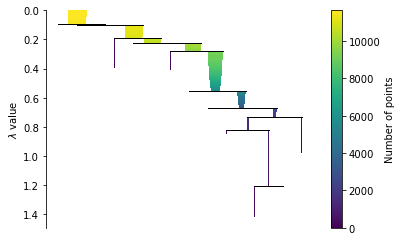

In [224]:
clusterer.condensed_tree_.plot()

/home/joeleliason/anaconda3/envs/hactnet/lib/python3.7/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<AxesSubplot:ylabel='$\\lambda$ value'>

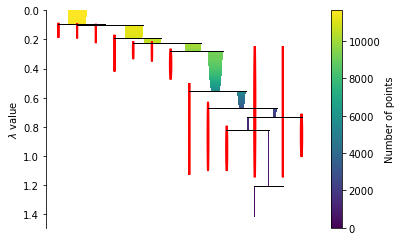

In [225]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))